Петрова Александра, БИН 22-1

# Задание 1.
 ## Построение матрицы карреляции. Зависимость курса рубля к доллару от цены на нефть марки Brent

## __**Гипотеза**__: чем выше цена на нефть, тем ниже курс американского доллара к российскому рублю.


 Таблица курса доллара к рублю: https://www.kaggle.com/datasets/fedesoriano/usd-rub-historical-data

Таблица цен на нефть марки Brent: https://www.kaggle.com/datasets/mabusalah/brent-oil-prices?select=BrentOilPrices.csv

Импортируем библиотеку `pandas` и после таблицу курса доллара к рублю

In [1]:
import pandas as pd
rub = pd.read_csv('USD_RUB.csv') 
rub.head()

,Date,Price,Open,High,Low,Change %
0,Apr 14 2022,80.9957,79.8675,82.3836,79.8563,1.41%
1,Apr 13 2022,79.8675,79.6800,80.2965,79.4078,0.24%
2,Apr 12 2022,79.6800,79.0650,80.2549,78.6952,0.78%
3,Apr 11 2022,79.0650,76.0800,81.2950,76.0800,3.92%
4,Apr 08 2022,76.0800,75.7500,76.2590,71.3993,0.44%


Переводим столбец `Date` из типа `object` в `datetime` при помощи функции `to_datetime`, изменяем интекс на столбец Data, сортируем по убыванию при помощи `sort_values()`

In [47]:
rub['Date'] = pd.to_datetime(rub.Date)     
rub = rub.sort_values(by='Date')
rub.index = rub['Date']
rub.head()

,Date,Price,Open,High,Low,Change %
Date,,,,,,
2001-09-14,2001-09-14,29.473,29.350,29.480,29.350,-0.00%
2001-09-17,2001-09-17,29.461,29.460,29.473,29.440,-0.04%
2001-09-18,2001-09-18,29.460,29.445,29.475,29.440,-0.00%
2001-09-19,2001-09-19,29.453,29.460,29.481,29.430,-0.02%
2001-09-20,2001-09-20,29.430,29.455,29.476,29.403,-0.08%


Удаляем лишние столбцы `(Date, Open, Hight, Low, Change %)` и оставляем только столбец `Price`. При помощи метода `loc`, убираем строки до 2002 и после 2021 года. Меняем название столбца с `Price` на `Price_RUB` и выводим окончательный вариант первый таблицы.

In [85]:
rub.drop(columns = ['Date','Open', 'High', 'Low', 'Change %'],axis = 1, inplace=True)
rub = rub.loc[(rub.index.year > 2001) & (rub.index.year < 2022)]
rub.rename(columns = {'Price':'Price_RUB'}, inplace = True)
rub.head()

,Price_RUB
Date,
2002-01-02,30.495
2002-01-03,30.615
2002-01-04,30.535
2002-01-07,30.535
2002-01-08,30.622


Импортируем и выводим вторую таблицу - данные о ценах на нефть. 

In [86]:
oil_brent = pd.read_csv('BrentOilPrices.csv')
oil_brent.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


Проводим такие же действия как и над первой таблицей и выводим результат

In [87]:
oil_brent['Date'] = pd.to_datetime(oil_brent.Date)    
oil_brent.index = oil_brent['Date'] 
oil_brent = oil_brent.loc[(oil_brent.index.year > 2001) & (oil_brent.index.year < 2022)]
oil_brent.drop(columns = ['Date'], axis = 1, inplace=True)
oil_brent.rename(columns = {'Price':'Price_OIL'}, inplace = True)
oil_brent.head()

,Price_OIL
Date,
2002-01-02,20.13
2002-01-03,20.47
2002-01-04,21.20
2002-01-07,21.08
2002-01-08,21.03


Строим диаграммы для обоих таблиц. Здесь уже можно заметить возможное наличие отрицательной корреляции. При увеличении одной переменной

<AxesSubplot: xlabel='Date'>

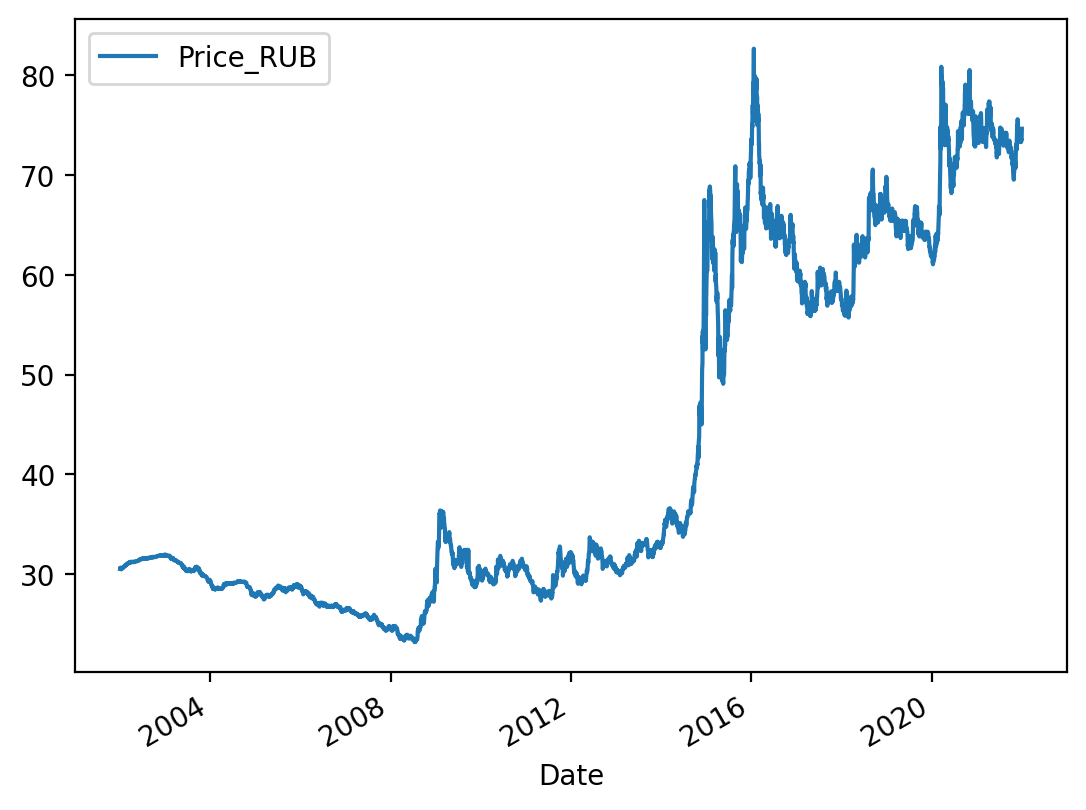

In [88]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
rub.plot()

<AxesSubplot: xlabel='Date'>

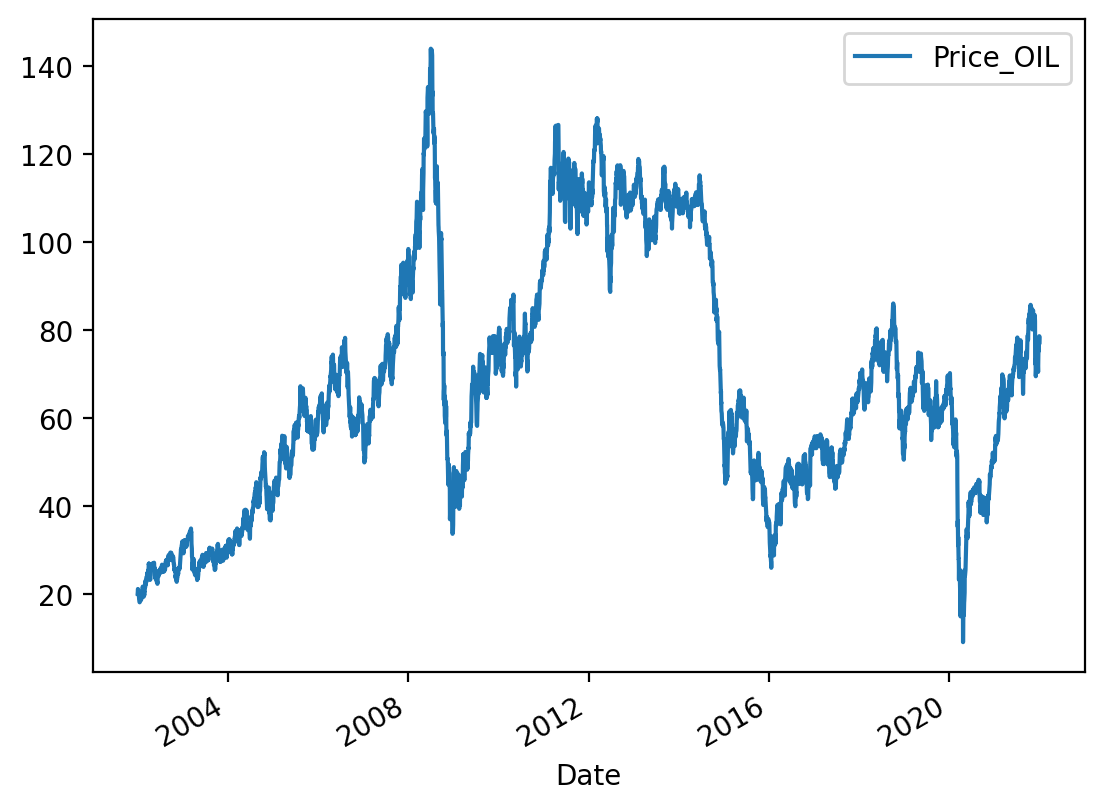

In [22]:
oil_brent.plot()

Соеденяем две таблицы, упорядочив по дате и удаляем столбец с датой.

In [89]:
df = pd.merge_asof(oil_brent, rub, on='Date')
df.index = df['Date']
df = df.drop('Date', axis=1)
df.head()



,Price_OIL,Price_RUB
Date,,
2002-01-02,20.13,30.495
2002-01-03,20.47,30.615
2002-01-04,21.20,30.535
2002-01-07,21.08,30.535
2002-01-08,21.03,30.622


Добавляем в таблицу столбцы, соответствующие году, месяцу и дню. 

In [90]:
df['Year'] = df.index.year
df['Mon'] = df.index.month
df['Day'] = df.index.day
dates = df[['Year','Mon','Day']]
dates.head()

,Year,Mon,Day
Date,,,
2002-01-02,2002,1,2
2002-01-03,2002,1,3
2002-01-04,2002,1,4
2002-01-07,2002,1,7
2002-01-08,2002,1,8


Переопределим индекс, используя `MultiIndex`

In [91]:
df.index = pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
df.head()

Price_OIL  Price_RUB  Year  Mon  Day
Year Mon Day                                      
2002 1   2        20.13     30.495  2002    1    2
         3        20.47     30.615  2002    1    3
         4        21.20     30.535  2002    1    4
         7        21.08     30.535  2002    1    7
         8        21.03     30.622  2002    1    8

Группируем элементы таблицы по году и месяцу и нахом среднее значение при помощи метода `mean` и записываем результат в новую таблицу.

In [92]:
mean = df.groupby(level=[0,1]).mean()
new_df = mean[['Price_OIL', 'Price_RUB']]
new_df.head(12)

Price_OIL  Price_RUB
Year Mon                      
2002 1    19.416818  30.582682
     2    20.275500  30.852500
     3    23.696667  31.109619
     4    25.728636  31.201909
     5    25.345455  31.278045
     6    24.081667  31.456333
     7    25.736087  31.545304
     8    26.651364  31.587273
     9    28.399524  31.658762
     10   27.543043  31.718652
     11   24.335238  31.835429
     12   28.334500  31.860150

Считаем значения по годам и строим матрицу корреляции

In [67]:
dt = new_df.unstack()
Price_Oil = dt["Price_OIL"]
mon = ['1','2','3','4','5','6','7','8','9','10','11','12']
Price_Oil.columns = mon
Price_Oil = Price_Oil[mon].mean(axis=1)
Price_RUB = dt['Price_RUB']
Price_RUB.columns = mon
Price_RUB = Price_RUB[mon].mean(axis=1)
mean = pd.concat([Price_Oil, Price_RUB], axis=1)
mean.columns = ['Цена на Нефть', 'Курс доллара к рублю']
corr = mean.corr()
corr

,Цена на Нефть,Курс доллара к рублю
Цена на Нефть,1.000000,-0.274903
Курс доллара к рублю,-0.274903,1.000000


([<matplotlib.axis.YTick at 0x17ce55ee320>,
 [Text(0, 0, 'Цена на Нефть'), Text(0, 1, 'Курс рубля к доллару')])

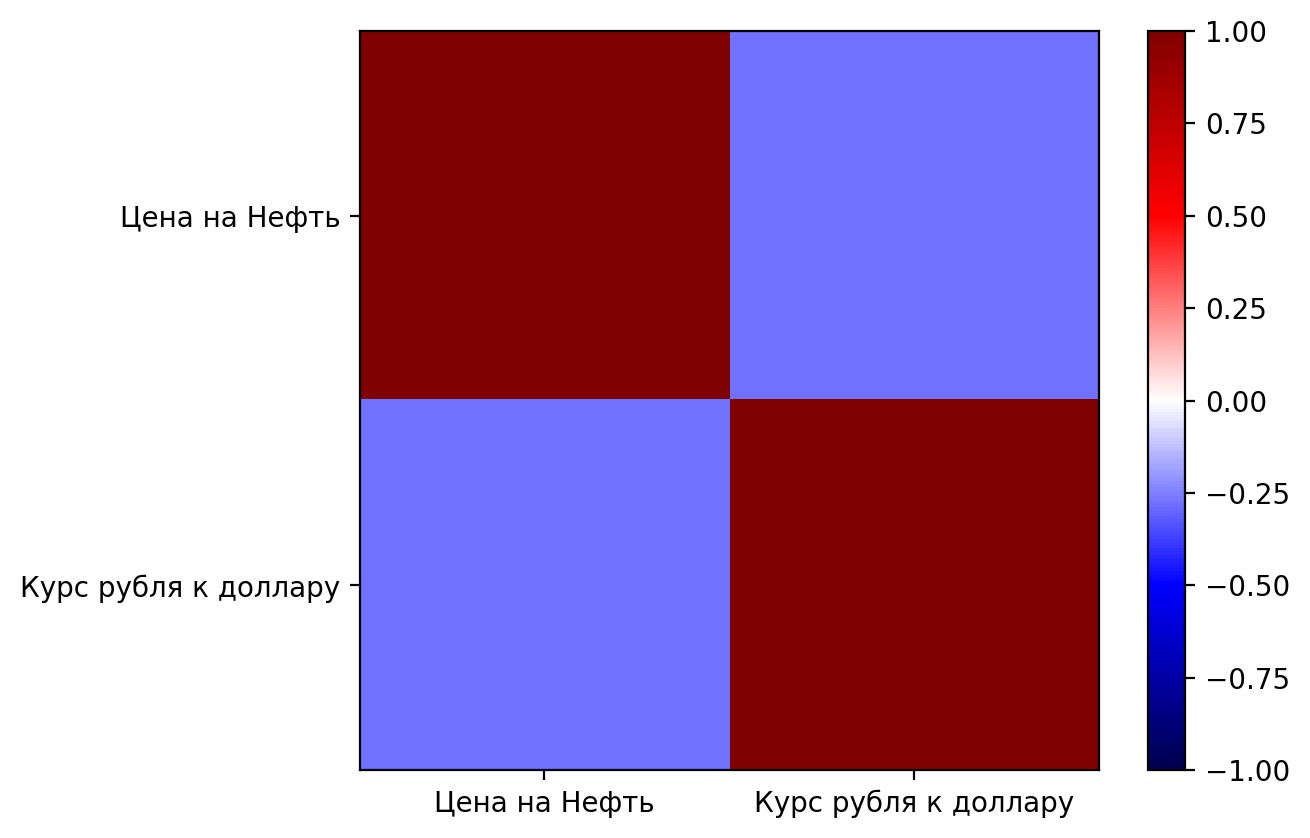

In [52]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

Можно увидеть отрицательную корреляцию. Это означает, что когда значения одной переменной убывают, то значения другой возрастают. Для лучшего понимания картины построим диаграмму рассеяния по таблице `df`.

In [93]:
dt.head(10)

Price_OIL                                                              \
Mon          1           2           3           4           5           6    
Year                                                                          
2002  19.416818   20.275500   23.696667   25.728636   25.345455   24.081667   
2003  31.183636   32.771000   30.612381   25.067727   25.857727   27.652857   
2004  31.280952   30.858500   33.634348   33.590909   37.567619   35.183636   
2005  44.509000   45.475000   53.104545   51.883810   48.645455   54.354545   
2006  62.985238   60.210000   62.064783   70.260000   69.776957   68.555909   
2007  53.681429   57.555789   62.050455   67.485789   67.212273   71.045714   
2008  92.178095   94.986500  103.635500  109.071364  122.797143  132.322381   
2009  43.439500   43.324737   46.540455   50.181905   57.302500   68.609545   
2010  76.167368   73.752105   78.827391   84.817619   75.945500   74.760909   
2011  96.523500  103.716316  114.643478  123.258889  114.989048  113.833182   

                                                      ...  Price_RUB  \
Mon           7           8           9           10  ...         3    
Year                                                  ...              
2002   25.736087   26.651364   28.399524   27.543043  ...  31.109619   
2003   28.348696   29.888095   27.112273   29.607826  ...  31.444190   
2004   38.221364   42.744091   43.196818   49.776667  ...  28.532304   
2005   57.520000   63.983478   62.908182   58.538571  ...  27.638909   
2006   73.674286   73.230435   61.958571   57.808182  ...  27.863391   
2007   76.930000   70.760870   77.173158   82.340000  ...  26.103864   
2008  132.718182  113.243333   97.234762   71.582174  ...  23.715650   
2009   64.435455   72.508571   67.646190   72.769545  ...  34.577864   
2010   75.580000   77.039545   77.840476   82.664762  ...  29.570117   
2011  116.973500  110.219545  112.833810  109.550000  ...  28.415652   

                                                                        \
Mon          4          5          6          7          8          9    
Year                                                                     
2002  31.201909  31.278045  31.456333  31.545304  31.587273  31.658762   
2003  31.195864  30.915545  30.471476  30.354391  30.360143  30.593636   
2004  28.718864  28.991714  29.033045  29.080227  29.223682  29.219455   
2005  27.801762  27.952455  28.519136  28.695048  28.474130  28.381727   
2006  27.541056  27.047826  26.995136  26.906190  26.758739  26.755238   
2007  25.813789  25.824591  25.909857  25.527143  25.632565  25.279842   
2008  23.526136  23.728857  23.633476  23.346636  24.239810  25.359905   
2009  33.510571  31.924450  31.031114  31.515514  31.858576  31.182100   
2010  29.177133  30.507210  31.265627  30.577162  30.382595  30.803095   
2011  28.079200  27.926700  27.953123  27.893415  28.823032  30.828386   

                                       
Mon          10         11         12  
Year                                   
2002  31.718652  31.835429  31.860150  
2003  30.126478  29.795100  29.424190  
2004  29.052762  28.566136  27.898435  
2005  28.559952  28.780455  28.801429  
2006  26.861182  26.592045  26.290947  
2007  24.886130  24.471429  24.573947  
2008  26.481478  27.329632  28.208000  
2009  29.449418  28.917720  30.057150  
2010  30.308524  30.988495  30.815486  
2011  31.247352  30.841814  31.579355  

[10 rows x 24 columns]

<AxesSubplot: xlabel='Цена на нефть', ylabel='Курс доллара к рублю'>

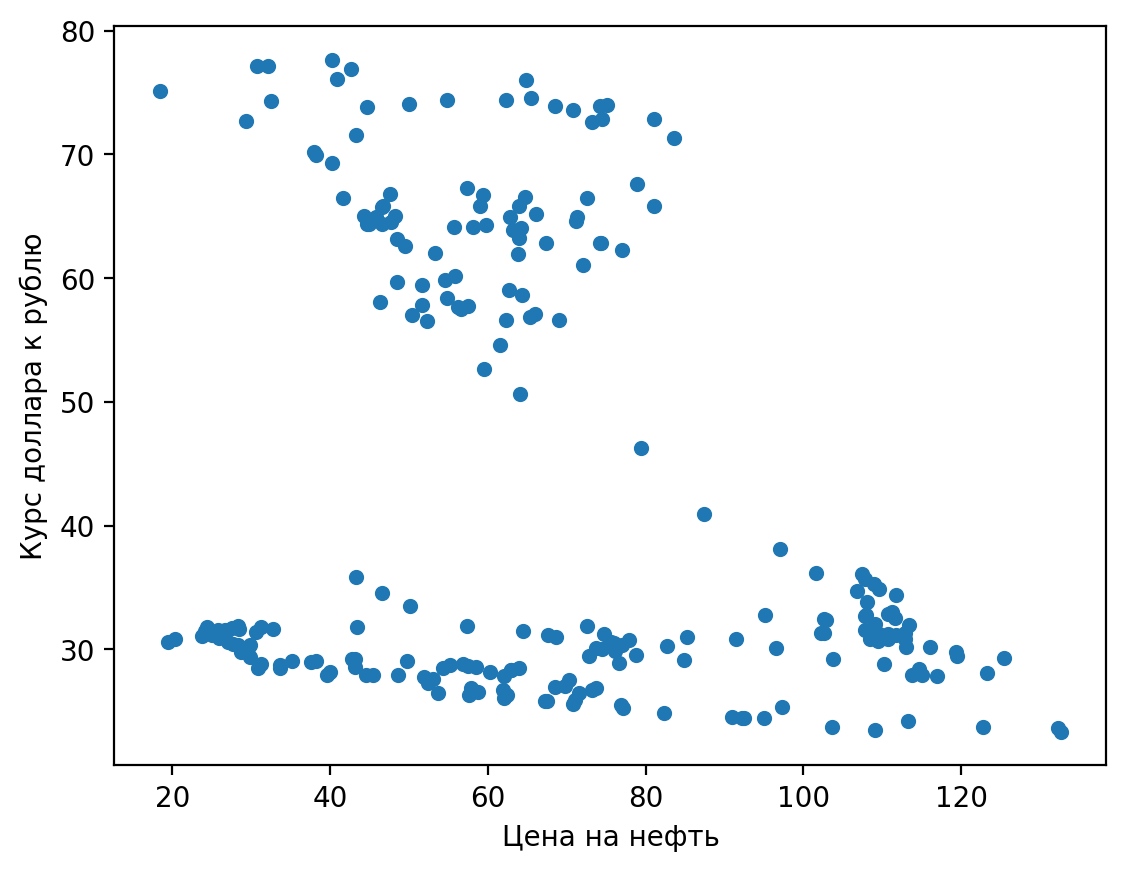

In [69]:
dt.plot(kind='scatter',x='Price_OIL',y='Price_RUB', xlabel='Цена на нефть', ylabel='Курс доллара к рублю')


### Как вы заметили, гипотеза подтвердилась, чем выше цена на нефть, тем ниже курс доллара к рублю. То есть, если цены на нефть на мировом рынке растут, то, соответственно, экономика России становится сильнее, однако если цены падают, то возникают проблемы. 

# Задание 2.
 ## Визуализация данных с `seaborn`

Импортируем библиотеки `seaborn` и `matplotlib`

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Загружаем таблицу с курсом доллару к рублю, использованную в первом задании, удаляем строки с пропущенными значениями и выводим первые пять строк при помощи `head()`

In [3]:
rub = pd.read_csv('USD_RUB.csv')
rub.dropna(inplace = True)
rub.head()

,Date,Price,Open,High,Low,Change %
0,Apr 14 2022,80.9957,79.8675,82.3836,79.8563,1.41%
1,Apr 13 2022,79.8675,79.6800,80.2965,79.4078,0.24%
2,Apr 12 2022,79.6800,79.0650,80.2549,78.6952,0.78%
3,Apr 11 2022,79.0650,76.0800,81.2950,76.0800,3.92%
4,Apr 08 2022,76.0800,75.7500,76.2590,71.3993,0.44%


**Показатели:**
* `Date`: дата, таблица содержит данные с 2022 по 2001
* `Price`: Цена закрытия
* `Open`: Цена открытия
* `High`: Наибольшая цена 
* `Low`: Наименьшая цена
* `Change %`: Процент изменения

Установим тему `Seaborn` и построим гистограму 

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\2711345528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rub['Price'])


<AxesSubplot: xlabel='Price', ylabel='Density'>

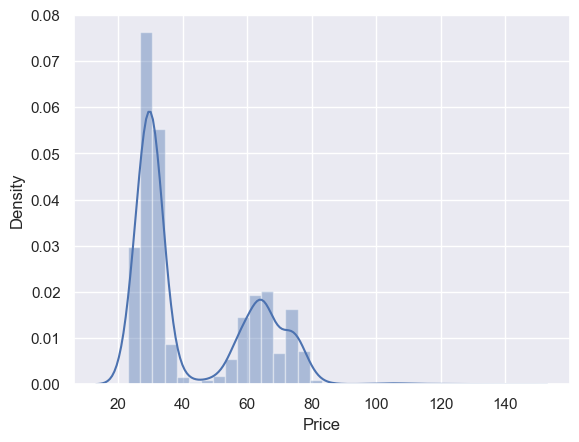

In [4]:
sns.set()
sns.distplot(rub['Price']) 

Уберем сглаженный график присвоив аргументу `kde` значение `False` и изменим цвет на красный

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\449045430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rub['Price'], kde = False, color = "red")


<AxesSubplot: xlabel='Price'>

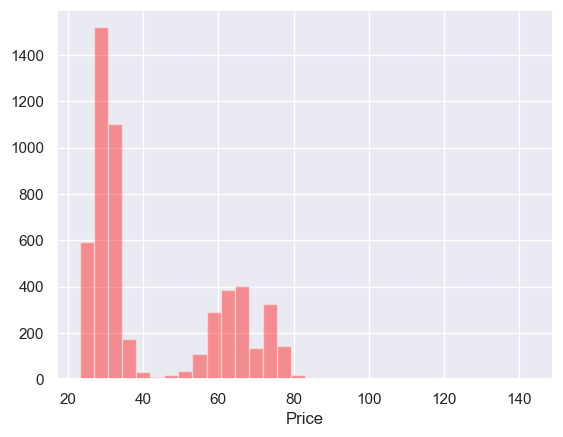

In [5]:
sns.distplot(rub['Price'], kde = False, color = "red")

Выведем 15 столбцов, задав значение аргументу `bins`, изменим цвет на розовый, установим значение прозрачности (`alpha`) 0.7 и сделаем красную обводку для столбцов (`edgecolor`)

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\376219581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rub['Price'],


<AxesSubplot: xlabel='Price'>

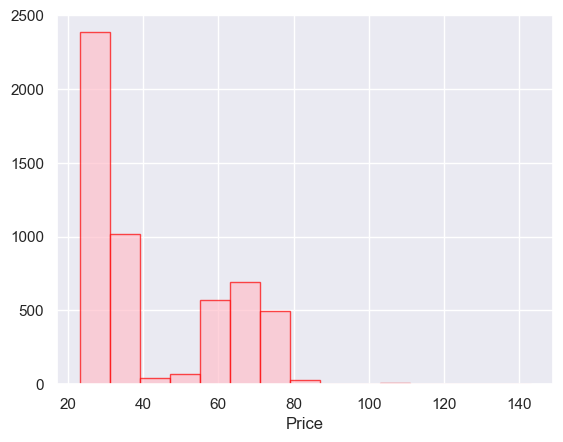

In [6]:
sns.distplot(rub['Price'], 
             kde = False, 
             color = "pink", 
             bins = 15, 
             hist_kws = {'alpha' : 0.7, 
                        'edgecolor' : 'red'})

Добавим сглаженный график и присвоим ему черный цвет, а так же подпишем оси (`xlabel` и `ylabel`) и добавим заголовок (`title`)

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\2524866604.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rub['Price'],


Text(0.5, 1.0, 'Distribution of RUB prices')

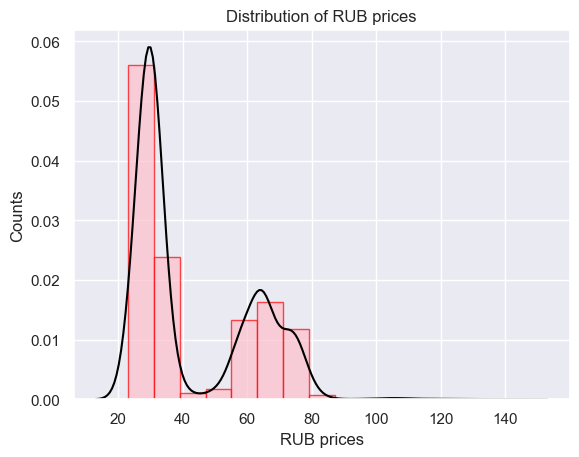

In [7]:
sns.distplot(rub['Price'], 
             color = "pink", 
             bins = 15, 
             hist_kws = {'alpha' : 0.7, 
                        'edgecolor' : 'red'},
             kde_kws = {'color' : 'black'})
plt.xlabel("RUB prices")
plt.ylabel("Counts")
plt.title("Distribution of RUB prices")


Добавим горизонтальную линию, отчерчивающую частоту в 1250 при помощи `plt.hlines`

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\1248008720.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rub['Price'],


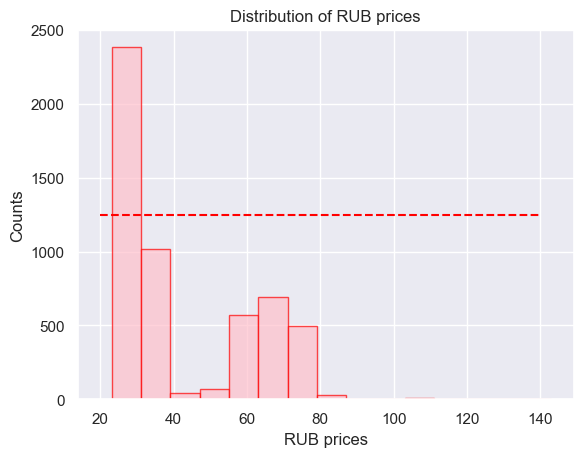

In [8]:
sns.distplot(rub['Price'], 
             color = "pink", 
             kde = False,
             bins = 15, 
             hist_kws = {'alpha' : 0.7, 
                        'edgecolor' : 'red'})
plt.xlabel("RUB prices")
plt.ylabel("Counts")
plt.title("Distribution of RUB prices")

plt.hlines(y = 1250, xmin = 20, xmax = 140, 
          color = "red", linestyles = "dashed")

Добавим вертикальную линию при помощи метода `vlines`, которая отмечает среднее значение по столбцу

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\1191215581.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rub['Price'],


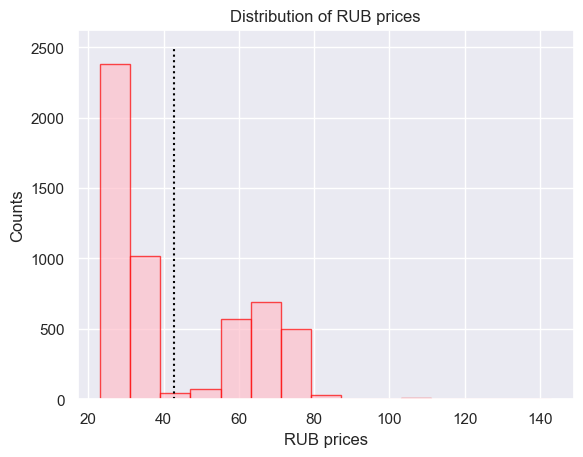

In [9]:
sns.distplot(rub['Price'], 
             color = "pink", 
             kde = False,
             bins = 15, 
             hist_kws = {'alpha' : 0.7, 
                        'edgecolor' : 'red'})
plt.xlabel("RUB prices")
plt.ylabel("Counts")
plt.title("Distribution of RUB prices")

plt.vlines(x = rub['Price'].mean(), ymin = 0, ymax = 2500, 
          color = "black", linestyles = "dotted")


Отобразим только сглаженный график, используя функцию `kdeplot()`

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\4021469062.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(rub['Price'], shade = True)


Text(0.5, 1.0, 'Distribution of RUB prices')

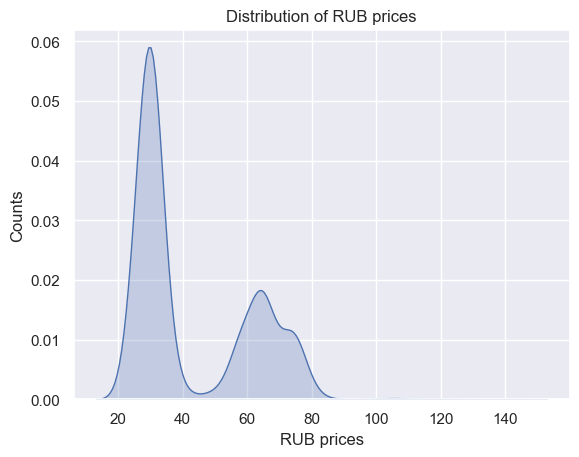

In [10]:
sns.kdeplot(rub['Price'], shade = True)
plt.xlabel("RUB prices")
plt.ylabel("Counts")
plt.title("Distribution of RUB prices")


Уберем отображение закрашивания под графиком (`hist = False`), и добавим отметки частоты на графике (`rug = True`)

C:\Users\kuren\AppData\Local\Temp\ipykernel_2376\2548923284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rub['Price'],


Text(0.5, 1.0, 'Distribution of RUB prices')

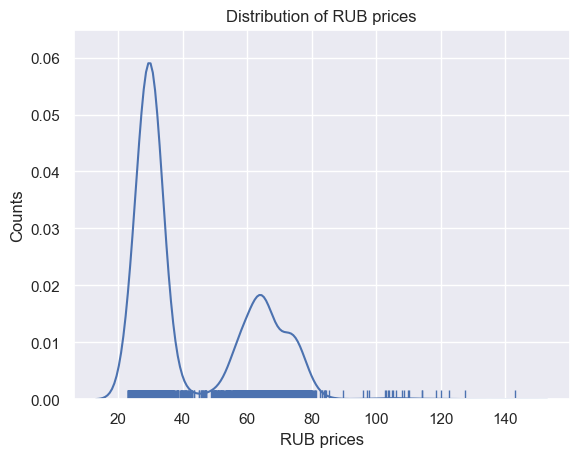

In [11]:
sns.distplot(rub['Price'], 
             hist = False, 
             rug = True)

plt.xlabel("RUB prices")
plt.ylabel("Counts")
plt.title("Distribution of RUB prices")

Я решила построить графики распределения по годам, в периоде с 2015 по 2020 год. Для начала переводим столбец с датой из типа данных `object` в `datetime`, далее создаем новый столбец только для года и заполняем его годами, беря данные из столбца `Date` с помощью `DatetimeIndex.year`. Выбираем нужный промежуток с помощью функции `isin` и записываем результат в новую таблицу `rub5years`, таблица `rub` нам еще понадобиться.

И далее строим графики распределения курса на выбранные пять лет

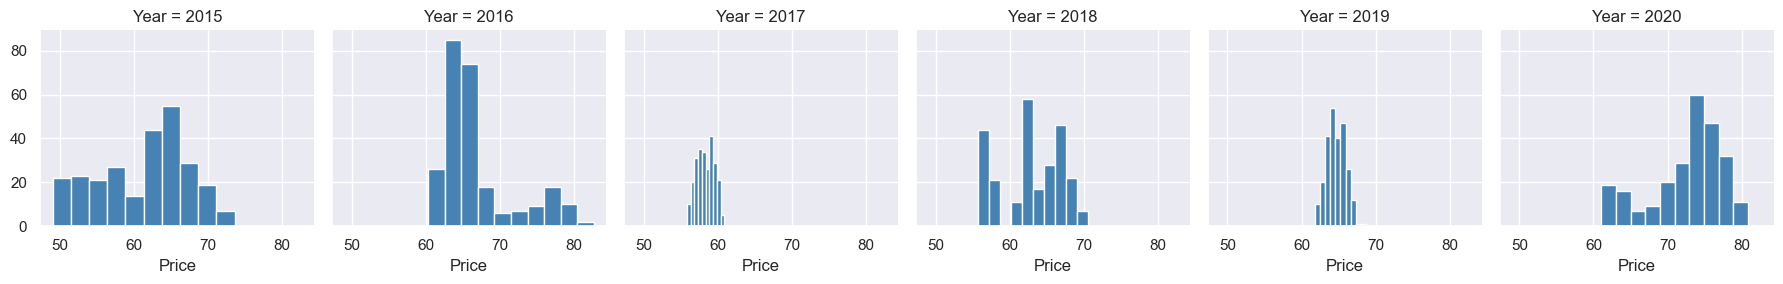

In [12]:
rub['Date'] = pd.to_datetime(rub.Date)
rub['Year']= pd.DatetimeIndex(rub['Date']).year
rub5years = rub[rub['Date'].isin(pd.date_range('2015-01-01','2020-12-31'))]

g = sns.FacetGrid(rub5years, col="Year", 
                  margin_titles=True)
g.map(plt.hist, "Price", color="steelblue")

Перейдем к подготовке таблицы для построения столбиковой диаграммы. Для того чтобы перевести столбец `Change %` в тип `float`, для начала нужно убрать символ `%` с конца каждой строки, сделала это с помощью `str`.`replace()`. Далее создаю столбец `Growth` обозначающий либо рост курса, либо падение. Снова выбираю нужный временой промежуток. И далее создаю функцию для последующего создания нового столбца, применя функцию с помощью `apply`. Столбец `Period` содержит данные о периодах, сопоставленные годам. 

Создадим таблицу `tab` с частотами падения и роста курса.

In [13]:
import numpy as np
rub['Change %'] = rub['Change %'].str.replace('%', '', regex=True)
rub['Change %'] = rub['Change %'].astype(float)
rub['Growth'] = np.where(rub['Change %'] > 0, 'Positive growth', 'Negative growth')
rub = rub[rub['Date'].isin(pd.date_range('2001-01-01','2020-12-31'))]
def f(row):
 if row['Year'] <= 2005:
   val = '2001-2005'
 elif  2005 < row['Year'] <= 2010:
   val = '2006-2010'
 elif 2010 < row['Year'] <= 2015:
   val = '2011-2015'
 else:
   val = '2016-2020'
 return val
rub['Period'] = rub.apply(f, axis=1)

tab = rub["Growth"].value_counts()
tab

,Date,Price,Open,High,Low,Change %,Year,Growth,Period
329,2020-12-30,74.4121,74.0354,74.9649,73.6495,0.51,2020,Positive growth,2016-2020
330,2020-12-29,74.0354,73.7570,74.0882,73.3793,0.38,2020,Positive growth,2016-2020
331,2020-12-28,73.7570,74.1956,74.1956,73.5498,-0.59,2020,Negative growth,2016-2020
332,2020-12-25,74.1956,73.8873,74.2233,73.6338,0.42,2020,Positive growth,2016-2020
333,2020-12-24,73.8873,75.0744,75.1465,73.8750,-1.58,2020,Negative growth,2016-2020


Меняю фон у графика на белый и строю диаграмму. Можно увидеть, что за выбранный период курс падал чаще, чем рос.

<AxesSubplot: >

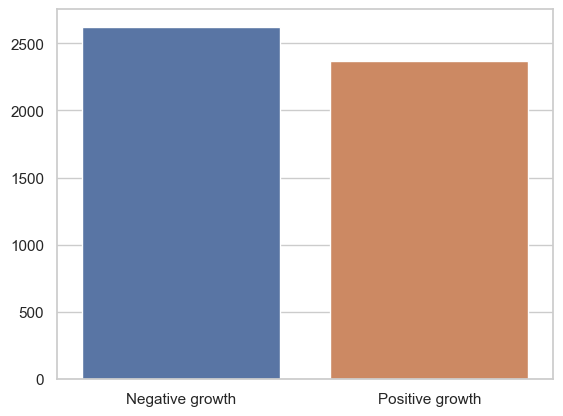

In [167]:
sns.set_style("whitegrid")
sns.barplot(x=tab.index, y=tab.values)

Сгруппируем данные

In [173]:
df = rub.groupby(['Period', 'Growth'], as_index=False).count()
df

,Period,Growth,Date,Price,Open,High,Low,Change %,Year
0,2001-2005,Negative growth,657,657,657,657,657,657,657
1,2001-2005,Positive growth,462,462,462,462,462,462,462
2,2006-2010,Negative growth,715,715,715,715,715,715,715
3,2006-2010,Positive growth,590,590,590,590,590,590,590
4,2011-2015,Negative growth,615,615,615,615,615,615,615
5,2011-2015,Positive growth,689,689,689,689,689,689,689
6,2016-2020,Negative growth,636,636,636,636,636,636,636
7,2016-2020,Positive growth,627,627,627,627,627,627,627


Оставим нужные столбцы `Period`, `Growth`, `Change %`

In [185]:
plot = df[['Period', 'Growth', 'Change %']]
plot

,Period,Growth,Change %
0,2001-2005,Negative growth,657
1,2001-2005,Positive growth,462
2,2006-2010,Negative growth,715
3,2006-2010,Positive growth,590
4,2011-2015,Negative growth,615
5,2011-2015,Positive growth,689
6,2016-2020,Negative growth,636
7,2016-2020,Positive growth,627


И применим функцию catplot()

Text(0.5, 32.99999999999997, 'Period')

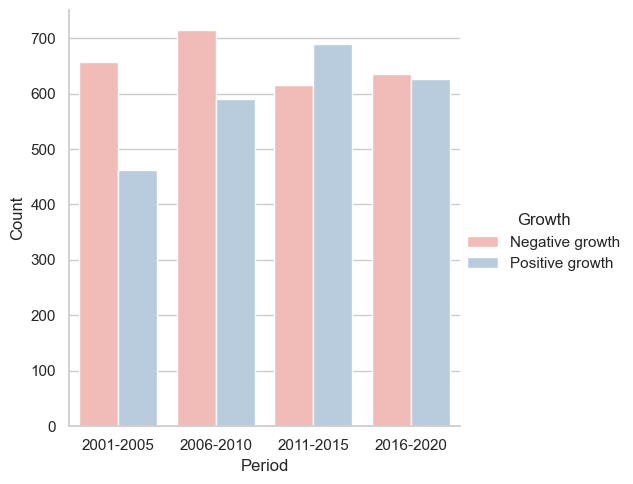

In [186]:
sns.catplot(x = 'Period', 
            y = 'Change %', 
            hue = 'Growth', 
            data = plot,
            kind = "bar",
            palette = "Pastel1")
plt.ylabel('Count')
plt.xlabel('Period')